<a href="https://colab.research.google.com/github/DongyounKim/basic_step/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Google colab version check
!python --version
#Check the list of moudules about pytorch
##!pip list | grep torch

Python 3.7.12


**Reference**

This is linear regression model based on "Full Stack Deep Learning course, Spring 2021" from https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing

In [2]:
import numpy as np
#Drawing framework
import matplotlib.pyplot as plt

# Basic regression


## Generate syntatic data


In [3]:
#The number of data
n= 100
#The dimension of data
d=2
#Generating synthetic data values
x= np.random.uniform(1,5,(n,d))
weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])
# @ is np.matmul
y_true = x @ weights_true + bias_true

In [4]:
#Drawing function
def plot_graph(x,y, y_pred=None):
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  #Drawing predicted model
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

## With a linear model

In [5]:
class basic_linear:
  def __init__(self, input_dim: int, num_hidden: int =1):
    self.weight= np.random.randn(input_dim,num_hidden) *np.sqrt(2./input_dim)
    self.bias = np.zeros(num_hidden)
  def __call__(self,x):
    self.x = x
    output = x@ self.weight + self.bias
    return output
  def backward(self,gradient):
    self.weight_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    #print('backward', gradient.shape, self.weight.T.shape)
    self.x_gradient = gradient @ self.weight.T
    #print('backward', self.weight_gradient, self.bias_gradient, self.x_gradient)
    return self.x_gradient
  def update(self, lr):
    self.weight = self.weight - lr*self.weight_gradient
    self.bias = self.bias - self.bias_gradient


In [6]:
#__init__ function ;; declaration of instance of class basic_linear
linear=basic_linear(d)
#__call__ : call for linear instance
y_predict= linear(x)

In [7]:
#from numpy.lib.function_base import gradient
class MSE:
  def __call__(self,y_pred,y_true):
    self.y_pred=y_pred
    self.y_true=y_true
    return((y_pred-y_true)**2).mean()
  def backward(self):
    n= self.y_true.shape[0]
    #print('y_true shape is {}'.format(n))
    self.gradient = 2. *(self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

In [9]:
from typing import Callable
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 7.578771670795105e+92
Epoch 1, loss 1.4807362426383961e+94
Epoch 2, loss 2.893054330574454e+95
Epoch 3, loss 5.652433646617737e+96
Epoch 4, loss 1.1043693784717901e+98
Epoch 5, loss 2.157710820428582e+99
Epoch 6, loss 4.215723539018345e+100
Epoch 7, loss 8.236657474750613e+101
Epoch 8, loss 1.6092736093449483e+103
Epoch 9, loss 3.1441899310163204e+104
Epoch 10, loss 6.143101002152429e+105
Epoch 11, loss 1.2002356966536039e+107
Epoch 12, loss 2.345013905870689e+108
Epoch 13, loss 4.581675277663383e+109
Epoch 14, loss 8.951651969909209e+110
Epoch 15, loss 1.7489688407434705e+112
Epoch 16, loss 3.4171257061534104e+113
Epoch 17, loss 6.676361419161002e+114
Epoch 18, loss 1.3044238237708074e+116
Epoch 19, loss 2.5485760958619264e+117


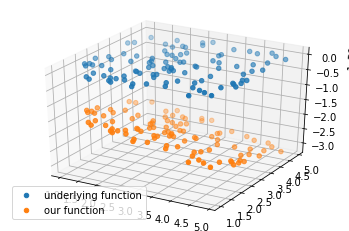

In [12]:
loss=MSE()
#print(loss(y_predict,y_true))
#loss_gradient = loss.backward()
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

In [ ]:
# #Declaration of MSE class & No __init__ function
# loss=MSE()
# print(loss(y_predict,y_true))
# loss_gradient = loss.backward()
# linear.backward(loss_gradient)
# linear.update(0.1)
# y_predict= linear(x)
# print(loss(y_predict,y_true))

In [ ]:
b=np.array([5,1]).T
a=np.array([1])
print(b)

In [ ]:
#In order to load the boston dataset, use scikit-learn library
from sklearn import datasets 
import pandas as pd
#Load the boston house price dataset
data_boston = datasets.load_boston()

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

In [ ]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.weights = np.random.randn(input,dim, num_hidden)* np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  def __call__(self,x):
    return x @ self.weights + self.bias

linear = Linear(d)

In [ ]:
!git clone link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/

# New Section